### Statistics Analysis 
The following notebook analyses distibutions of the `p-values` and `t-statistics` collected from the articles.

- The biggest problem with gathering data for this part is that there is no uniform pattern in
reporting the results. Therefore, data was collected manually.

 - Most of the papers do not report both statistics
 
 - Many papers report standard errors instead of `p/t-values` and marks significance with `*`
 
 
- Out of 12 **central bank papers only 7 unique**, reported either `p/t-values` and 2 papers reported both.


In [1]:
import pandas as pd
import numpy as np
from read_json import JsonHelpers
import json
import os
import sys

# Load json helpers 
jfun = JsonHelpers()

# Get location of the csv files
tstats = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/tstatistics.csv')
pvalues = pd.read_csv('/Users/Wiktor/Dropbox/Git/MasterThesis/Literature/Statistics/pvalues.csv')

# Stack columns and create column with paper labels
pvalues = pd.DataFrame(pvalues.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
pvalues.columns = ['article', 'pvalue']

# Cleaning pvalues
pvalues['pvalue'] = pvalues['pvalue'].astype(float)
pvalues = pvalues[(pvalues['pvalue'] >=0) & (pvalues['pvalue'] <=1)]


# Stack columns and create column with paper labels
tstats = pd.DataFrame(tstats.stack(dropna=False)).reset_index(level=1).reset_index(drop=True)
tstats.columns = ['article', 'tstat']

# Cleaning tstat
tstats['tstat'] = tstats['tstat'].astype(float)
tstats = tstats[(tstats['tstat'] < 100)]

# Get central bank papers' labels
cb_label = jfun.central_bank_paper_label()
cb_label

['p001',
 'p008',
 'p023',
 'p024',
 'p025',
 'p032',
 'p041',
 'p052',
 'p053',
 'p054',
 'p059',
 'p065']

In [39]:
# Split t-stats: central bank paper vs remainder
tstats_cb = tstats[tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)
tstats_ncb = tstats[~tstats['article'].isin(cb_label)].dropna().reset_index(drop=True)

# Split p-values: central bank paper vs remainder
pvalues_cb = pvalues[pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)
pvalues_ncb = pvalues[~pvalues['article'].isin(cb_label)].dropna().reset_index(drop=True)


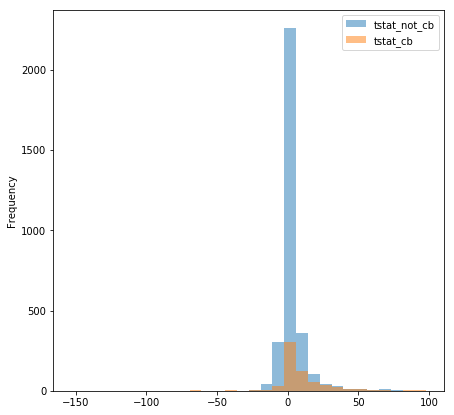

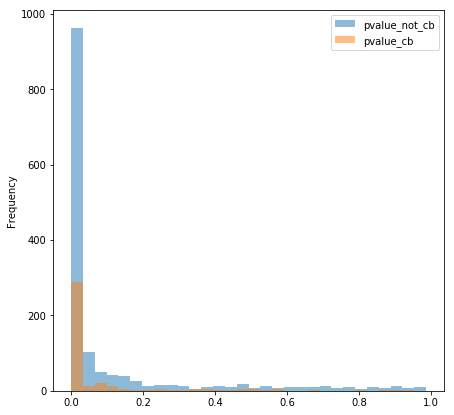

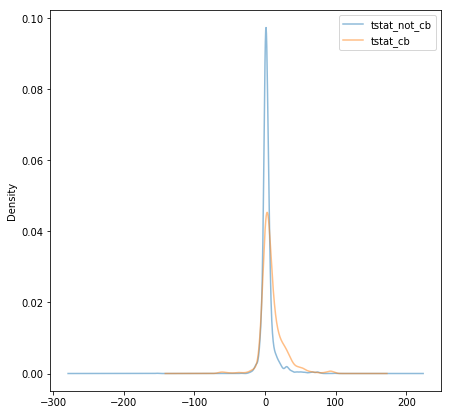

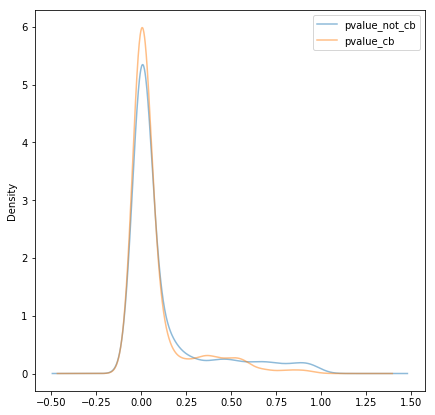

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline  

tstat_df = pd.concat([tstats_ncb['tstat'], tstats_cb['tstat']], axis=1)
tstat_df.columns = ['tstat_not_cb', 'tstat_cb']

pvalue_df = pd.concat([pvalues_ncb['pvalue'], pvalues_cb['pvalue']], axis=1)
pvalue_df.columns = ['pvalue_not_cb', 'pvalue_cb']

# Histograms
tstat_df.plot.hist(alpha=0.5, bins = 30, figsize=(7,7))
pvalue_df.plot.hist(alpha=0.5, bins = 30, figsize=(7,7))

# Density plots
tstat_df.plot.density(alpha=0.5, figsize=(7,7))
pvalue_df.plot.density(alpha=0.5, figsize=(7,7))

In [46]:
from scipy.stats import ks_2samp
ks_2samp(np.array(tstat_df['tstat_not_cb']), np.array(tstat_df['tstat_cb']))


Ks_2sampResult(statistic=0.8073796122576611, pvalue=0.0)